# Introduction to PyTorch: From Research to Production

This comprehensive notebook introduces PyTorch fundamentals, covering everything from basic tensors to production deployment. Based on the PyTorch Introduction video by Brad Heinz, this tutorial is designed for learners transitioning from TensorFlow to PyTorch, with a focus on NLP applications and Australian-themed examples.

## Learning Objectives
By the end of this notebook, you will understand:
- **PyTorch Overview**: Key features, ecosystem, and advantages
- **Tensors**: Core data abstraction and operations (300+ mathematical operations)
- **Autograd**: Automatic differentiation engine for gradient computation
- **Neural Networks**: Building models with `nn.Module` (LeNet-5 example)
- **Data Loading**: Efficient data processing with Dataset and DataLoader
- **Training Loops**: Manual training vs TensorFlow's `model.fit()`
- **TorchScript**: Model deployment and production optimization

## Key Differences from TensorFlow
| Aspect | TensorFlow | PyTorch |
|--------|------------|---------|
| **Execution** | Graph-based (TF 1.x) or Eager (TF 2.x) | Always eager (dynamic graphs) |
| **Model Definition** | `tf.keras.Sequential` or Functional API | `nn.Module` subclass |
| **Training** | `model.fit()` | Manual training loops |
| **Autograd** | `tf.GradientTape` | Automatic with `.backward()` |
| **Device Management** | Automatic with strategies | Explicit `.to(device)` |

## Australian Context Examples
Throughout this notebook, we'll use Australian tourism, city data, and English-Vietnamese language pairs to demonstrate PyTorch concepts in practical, relatable contexts.

---

## 1. Environment Setup and Runtime Detection

Following PyTorch best practices for cross-platform compatibility:

In [25]:
# Environment Detection and Setup
import sys
import subprocess
import os
import time

# Detect the runtime environment
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules or "kaggle" in os.environ.get('KAGGLE_URL_BASE', '')
IS_LOCAL = not (IS_COLAB or IS_KAGGLE)

print(f"🌐 Environment detected:")
print(f"  - Local: {IS_LOCAL}")
print(f"  - Google Colab: {IS_COLAB}")
print(f"  - Kaggle: {IS_KAGGLE}")

# Platform-specific system setup
if IS_COLAB:
    print("\n🔧 Setting up Google Colab environment...")
    # Colab usually has PyTorch pre-installed
elif IS_KAGGLE:
    print("\n🔧 Setting up Kaggle environment...")
    # Kaggle usually has most packages pre-installed
else:
    print("\n🔧 Setting up local environment...")

🌐 Environment detected:
  - Local: False
  - Google Colab: True
  - Kaggle: False

🔧 Setting up Google Colab environment...


In [26]:
# Install required packages based on platform
required_packages = [
    "torch",
    "torchvision",
    "matplotlib",
    "tensorboard"
]

print("📦 Installing required packages...")
for package in required_packages:
    if IS_COLAB or IS_KAGGLE:
        # Use IPython magic commands for notebook environments
        try:
            exec(f"!pip install -q {package}")
            print(f"✅ {package}")
        except:
            print(f"⚠️ {package} (may already be installed)")
    else:
        try:
            subprocess.run([sys.executable, "-m", "pip", "install", "-q", package],
                          capture_output=True, check=True)
            print(f"✅ {package}")
        except subprocess.CalledProcessError:
            print(f"⚠️ {package} (may already be installed)")

print("\n🎉 Package installation completed!")

📦 Installing required packages...
⚠️ torch (may already be installed)
⚠️ torchvision (may already be installed)
⚠️ matplotlib (may already be installed)
⚠️ tensorboard (may already be installed)

🎉 Package installation completed!


In [27]:
# Verify PyTorch installation and import core libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import tempfile

print(f"🔥 PyTorch {torch.__version__} ready!")
print(f"🖥️ CUDA available: {torch.cuda.is_available()}")
print(f"🎯 Device: {'GPU' if torch.cuda.is_available() else 'CPU'}")

# Set device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n💾 Using device: {device}")

# Store device info for later use
DEVICE = device
DEVICE_INFO = f"{'CUDA GPU' if torch.cuda.is_available() else 'CPU'}"

🔥 PyTorch 2.8.0+cu126 ready!
🖥️ CUDA available: True
🎯 Device: GPU

💾 Using device: cuda


## 2. PyTorch Overview and Key Features

PyTorch is an open-source machine learning framework that accelerates the path from research prototyping to production deployment. Let's explore its key features and ecosystem.

In [28]:
print("🔥 PyTorch: Open-source ML Framework\n")

print("🛠️ Key Features:")
features = [
    "Comprehensive toolkit for ML applications",
    "Deep learning primitives (layers, activations, optimizers)",
    "Hardware acceleration (CUDA GPUs, Apple Silicon MPS)",
    "Rich ecosystem: torchvision, torchtext, torchaudio",
    "Fast iteration with 'Define-by-Run' paradigm",
    "Automatic differentiation (autograd) engine",
    "Enterprise tools: TorchScript, TorchServe, quantization",
    "Open source with large community"
]

for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

print("\n🌟 Why PyTorch for NLP and Australian Applications:")
print("  • Hugging Face ecosystem: State-of-the-art NLP models")
print("  • Research-friendly: Most academic papers use PyTorch")
print("  • Dynamic graphs: Perfect for variable-length text")
print("  • Memory sharing with NumPy: Efficient data processing")
print("  • Community projects: AllenNLP, ClassyVision, Captum")

print("\n🚀 Used by top companies: Facebook, Tesla, OpenAI, Netflix")

print("\n📊 Ecosystem Overview:")
print(f"  PyTorch version: {torch.__version__}")
print(f"  Available on device: {DEVICE}")
print(f"  Device info: {DEVICE_INFO}")
print(f"  TorchVision version: {torchvision.__version__}")

🔥 PyTorch: Open-source ML Framework

🛠️ Key Features:
  1. Comprehensive toolkit for ML applications
  2. Deep learning primitives (layers, activations, optimizers)
  3. Hardware acceleration (CUDA GPUs, Apple Silicon MPS)
  4. Rich ecosystem: torchvision, torchtext, torchaudio
  5. Fast iteration with 'Define-by-Run' paradigm
  6. Automatic differentiation (autograd) engine
  7. Enterprise tools: TorchScript, TorchServe, quantization
  8. Open source with large community

🌟 Why PyTorch for NLP and Australian Applications:
  • Hugging Face ecosystem: State-of-the-art NLP models
  • Research-friendly: Most academic papers use PyTorch
  • Dynamic graphs: Perfect for variable-length text
  • Memory sharing with NumPy: Efficient data processing
  • Community projects: AllenNLP, ClassyVision, Captum

🚀 Used by top companies: Facebook, Tesla, OpenAI, Netflix

📊 Ecosystem Overview:
  PyTorch version: 2.8.0+cu126
  Available on device: cuda
  Device info: CUDA GPU
  TorchVision version: 0.23.0

## 3. Tensors: The Core Data Abstraction

Tensors are central to everything in PyTorch. They are multi-dimensional arrays with extra capabilities, supporting over 300 mathematical and logical operations. Although accessed through Python, computations are performed in optimized C++ code.

In [29]:
print("🧮 PyTorch Tensors: Multi-dimensional Arrays with Superpowers\n")

# Create tensors with Australian tourism data
print("🏖️ Creating Tensors: Australian Tourism Data\n")

# Tourist visitor numbers (millions) for major Australian cities
# Cities: Sydney, Melbourne, Brisbane, Perth, Adelaide
tourist_visitors = torch.tensor([4.6, 3.2, 2.8, 1.4, 1.1], dtype=torch.float32)
print(f"Tourist visitors (millions): {tourist_visitors}")
print(f"Tensor shape: {tourist_visitors.shape}")
print(f"Data type: {tourist_visitors.dtype}")
print(f"Device: {tourist_visitors.device}")

# 2D tensor: Tourism spending by category and city
# Rows: Cities (Sydney, Melbourne, Brisbane)
# Columns: Categories (Accommodation, Food, Transport, Activities)
tourism_spending = torch.tensor([
    [180.5, 85.2, 45.7, 120.0],  # Sydney
    [165.0, 95.5, 38.2, 110.5],  # Melbourne
    [145.8, 75.3, 42.1, 95.0]    # Brisbane
], dtype=torch.float32)

print(f"\nTourism spending matrix: {tourism_spending.shape}")
print(tourism_spending)

# Tensor operations with Australian weather data
cities = ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide"]
summer_temps = torch.tensor([26.5, 25.5, 28.0, 30.5, 28.5], dtype=torch.float32)
winter_temps = torch.tensor([17.0, 14.0, 21.0, 18.5, 15.5], dtype=torch.float32)

print(f"\n🌤️ Tensor Operations: Australian Weather Analysis")
print(f"Summer temperatures: {summer_temps}")
print(f"Winter temperatures: {winter_temps}")

# Arithmetic operations (over 300 available!)
temp_difference = summer_temps - winter_temps
avg_temp = (summer_temps + winter_temps) / 2
temp_range = torch.abs(temp_difference)

print(f"\nTemperature differences: {temp_difference}")
print(f"Average temperatures: {avg_temp}")
print(f"Temperature ranges: {temp_range}")

# Statistical operations
print(f"\n📈 Statistical Analysis (PyTorch's 300+ operations):")
print(f"Hottest summer city: {cities[torch.argmax(summer_temps)]} ({torch.max(summer_temps):.1f}°C)")
print(f"Coldest winter city: {cities[torch.argmin(winter_temps)]} ({torch.min(winter_temps):.1f}°C)")
print(f"Mean summer temp: {torch.mean(summer_temps):.1f}°C")
print(f"Std dev: {torch.std(summer_temps):.1f}°C")

# TensorFlow comparison
print("\n📊 TensorFlow vs PyTorch Tensor Creation:")
print("   TensorFlow: tf.constant([1, 2, 3], dtype=tf.float32)")
print("   PyTorch:    torch.tensor([1, 2, 3], dtype=torch.float32)")
print("   TensorFlow: tf.zeros([2, 3])")
print("   PyTorch:    torch.zeros(2, 3)")
print("   TensorFlow: tf.random.normal([2, 3])")
print("   PyTorch:    torch.randn(2, 3)")

🧮 PyTorch Tensors: Multi-dimensional Arrays with Superpowers

🏖️ Creating Tensors: Australian Tourism Data

Tourist visitors (millions): tensor([4.6000, 3.2000, 2.8000, 1.4000, 1.1000])
Tensor shape: torch.Size([5])
Data type: torch.float32
Device: cpu

Tourism spending matrix: torch.Size([3, 4])
tensor([[180.5000,  85.2000,  45.7000, 120.0000],
        [165.0000,  95.5000,  38.2000, 110.5000],
        [145.8000,  75.3000,  42.1000,  95.0000]])

🌤️ Tensor Operations: Australian Weather Analysis
Summer temperatures: tensor([26.5000, 25.5000, 28.0000, 30.5000, 28.5000])
Winter temperatures: tensor([17.0000, 14.0000, 21.0000, 18.5000, 15.5000])

Temperature differences: tensor([ 9.5000, 11.5000,  7.0000, 12.0000, 13.0000])
Average temperatures: tensor([21.7500, 19.7500, 24.5000, 24.5000, 22.0000])
Temperature ranges: tensor([ 9.5000, 11.5000,  7.0000, 12.0000, 13.0000])

📈 Statistical Analysis (PyTorch's 300+ operations):
Hottest summer city: Perth (30.5°C)
Coldest winter city: Melbourne 

## 4. Autograd: Automatic Differentiation Engine

The autograd engine drives eager mode computation and enables rapid model iteration. It automatically computes gradients using the chain rule by tracking tensor operations in a Directed Acyclic Graph (DAG). This is what makes the `.backward()` call so powerful.

In [30]:
print("⚡ Autograd: Automatic Differentiation in Action\n")

# Simple RNN example (as described in the video)
print("🧠 Simple RNN Forward Pass + Autograd (from the video)\n")

torch.manual_seed(42)  # Reproducibility

# RNN parameters (requires_grad=True for gradient computation)
input_size = 5  # Australian city features
hidden_size = 8
output_size = 3  # Sydney, Melbourne, Brisbane

# Learnable weights (like the RNN example from the video)
W_input = torch.randn(hidden_size, input_size, requires_grad=True)
W_hidden = torch.randn(hidden_size, hidden_size, requires_grad=True)
W_output = torch.randn(output_size, hidden_size, requires_grad=True)
b_hidden = torch.randn(hidden_size, requires_grad=True)
b_output = torch.randn(output_size, requires_grad=True)

# Sample input: [population_mil, avg_temp, tourism_mil, coastal, wine_region]
# Sydney example
x = torch.tensor([5.3, 21.8, 4.6, 1.0, 0.0])  # Sydney features
h_prev = torch.zeros(hidden_size)  # Initial hidden state

print(f"Input features (Sydney): {x}")
print(f"Feature meanings: [population_mil, avg_temp, tourism_mil, coastal, wine_region]")

# Forward pass (exactly like the RNN example in the video)
h_input = torch.matmul(W_input, x)  # Input transformation
h_hidden = torch.matmul(W_hidden, h_prev)  # Hidden state transformation
h_combined = h_input + h_hidden + b_hidden  # Combine
h_new = torch.tanh(h_combined)  # Activation (hyperbolic tangent)

# Output layer
output = torch.matmul(W_output, h_new) + b_output
probabilities = torch.softmax(output, dim=0)

# Target (correct city: Sydney = index 0)
target = torch.tensor([1.0, 0.0, 0.0])  # One-hot encoding for Sydney
loss = torch.nn.functional.cross_entropy(output.unsqueeze(0), torch.tensor([0]))

print(f"\nPredicted probabilities: {probabilities}")
print(f"City predictions: Sydney={probabilities[0]:.3f}, Melbourne={probabilities[1]:.3f}, Brisbane={probabilities[2]:.3f}")
print(f"Loss: {loss.item():.4f}")

# The magic: compute all gradients with one line (as shown in the video)
print(f"\n⚡ Computing gradients with ONE line: loss.backward()")
loss.backward()

print(f"\n📈 Autograd computed gradients for ALL parameters automatically!")
print(f"W_input gradient norm: {W_input.grad.norm().item():.4f}")
print(f"W_hidden gradient norm: {W_hidden.grad.norm().item():.4f}")
print(f"W_output gradient norm: {W_output.grad.norm().item():.4f}")

print(f"\n🔧 This enables training: adjust weights opposite to gradients")
print(f"🎯 Key insight: PyTorch tracks every operation to build computation graph")
print(f"📊 DAG (Directed Acyclic Graph) enables flexible model architectures")

print(f"\n🔍 TensorFlow vs PyTorch Gradients:")
print(f"   TensorFlow: with tf.GradientTape() as tape: ...")
print(f"   PyTorch:    loss.backward()  # Automatic!")

⚡ Autograd: Automatic Differentiation in Action

🧠 Simple RNN Forward Pass + Autograd (from the video)

Input features (Sydney): tensor([ 5.3000, 21.8000,  4.6000,  1.0000,  0.0000])
Feature meanings: [population_mil, avg_temp, tourism_mil, coastal, wine_region]

Predicted probabilities: tensor([0.5259, 0.0189, 0.4552], grad_fn=<SoftmaxBackward0>)
City predictions: Sydney=0.526, Melbourne=0.019, Brisbane=0.455
Loss: 0.6426

⚡ Computing gradients with ONE line: loss.backward()

📈 Autograd computed gradients for ALL parameters automatically!
W_input gradient norm: 0.0000
W_hidden gradient norm: 0.0000
W_output gradient norm: 1.8598

🔧 This enables training: adjust weights opposite to gradients
🎯 Key insight: PyTorch tracks every operation to build computation graph
📊 DAG (Directed Acyclic Graph) enables flexible model architectures

🔍 TensorFlow vs PyTorch Gradients:
   TensorFlow: with tf.GradientTape() as tape: ...
   PyTorch:    loss.backward()  # Automatic!


## 5. TensorBoard Setup for Training Monitoring

PyTorch requires explicit TensorBoard setup (unlike TensorFlow's integrated callbacks):

In [31]:
# Platform-specific TensorBoard log directory setup
def get_run_logdir(name="cifar10_training"):
    """Create unique log directory for this training run."""
    if IS_COLAB:
        root_logdir = "/content/tensorboard_logs"
    elif IS_KAGGLE:
        root_logdir = "./tensorboard_logs"
    else:
        root_logdir = "./tensorboard_logs"

    # Create root directory if it doesn't exist
    os.makedirs(root_logdir, exist_ok=True)

    # Generate unique run directory
    timestamp = datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
    run_logdir = os.path.join(root_logdir, f"{name}_{timestamp}")
    return run_logdir

# Initialize TensorBoard writer
log_dir = get_run_logdir("hello_pytorch_cifar")
writer = SummaryWriter(log_dir=log_dir)

print(f"📊 TensorBoard logs will be saved to: {log_dir}")
print(f"💡 To view logs, run: tensorboard --logdir={log_dir}")

📊 TensorBoard logs will be saved to: /content/tensorboard_logs/hello_pytorch_cifar_2025_09_21-10_01_15
💡 To view logs, run: tensorboard --logdir=/content/tensorboard_logs/hello_pytorch_cifar_2025_09_21-10_01_15


## 3. Data Loading and Preprocessing

**Key Difference from TensorFlow**: PyTorch uses explicit transforms and DataLoader objects:

In [32]:
# Data transformations for training and testing
# TensorFlow equivalent: tf.keras.preprocessing.image.ImageDataGenerator

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Data augmentation
    transforms.ToTensor(),                   # Convert PIL Image to tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # CIFAR-10 statistics
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Download and load CIFAR-10 dataset
print("📥 Loading CIFAR-10 dataset...")

try:
    # Try to download CIFAR-10 dataset (requires internet)
    print("🌐 Attempting to download CIFAR-10 dataset...")

    # Training dataset
    trainset = torchvision.datasets.CIFAR10(
        root='./data',
        train=True,
        download=True,
        transform=transform_train
    )

    # Test dataset
    testset = torchvision.datasets.CIFAR10(
        root='./data',
        train=False,
        download=True,
        transform=transform_test
    )

    print("✅ CIFAR-10 dataset downloaded successfully!")

except Exception as e:
    print(f"⚠️ Cannot download CIFAR-10 dataset: {type(e).__name__}")
    print("🔄 Creating synthetic dataset for demonstration purposes...")

    # Create synthetic CIFAR-10-like dataset for demo when offline
    from torch.utils.data import TensorDataset

    # Generate synthetic data: 32x32 RGB images
    synthetic_train_images = torch.randn(1000, 3, 32, 32)  # 1000 training samples
    synthetic_train_labels = torch.randint(0, 10, (1000,))  # Random labels 0-9

    synthetic_test_images = torch.randn(200, 3, 32, 32)   # 200 test samples
    synthetic_test_labels = torch.randint(0, 10, (200,))   # Random labels 0-9

    # Apply transformations manually to synthetic data
    # Normalize using CIFAR-10 statistics
    mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
    std = torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1)

    synthetic_train_images = (synthetic_train_images - mean) / std
    synthetic_test_images = (synthetic_test_images - mean) / std

    # Create tensor datasets
    trainset = TensorDataset(synthetic_train_images, synthetic_train_labels)
    testset = TensorDataset(synthetic_test_images, synthetic_test_labels)

    print("✅ Synthetic dataset created for demonstration!")
    print("📝 Note: This is random data, not real CIFAR-10 images")

# Data loaders (equivalent to TensorFlow's tf.data.Dataset)
batch_size = 32  # Small batch size for educational purposes

trainloader = DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,      # Shuffle training data
    num_workers=0      # Use 0 for synthetic data to avoid pickling issues
)

testloader = DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False,     # Don't shuffle test data
    num_workers=0      # Use 0 for synthetic data to avoid pickling issues
)

# CIFAR-10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

print(f"✅ Dataset loaded successfully!")
print(f"📊 Training samples: {len(trainset)}")
print(f"📊 Test samples: {len(testset)}")
print(f"🏷️ Classes: {classes}")

📥 Loading CIFAR-10 dataset...
🌐 Attempting to download CIFAR-10 dataset...
✅ CIFAR-10 dataset downloaded successfully!
✅ Dataset loaded successfully!
📊 Training samples: 50000
📊 Test samples: 10000
🏷️ Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## 4. Data Visualization

Let's visualize some sample images from our dataset:

/tmp/ipython-input-3813368247.py:28: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


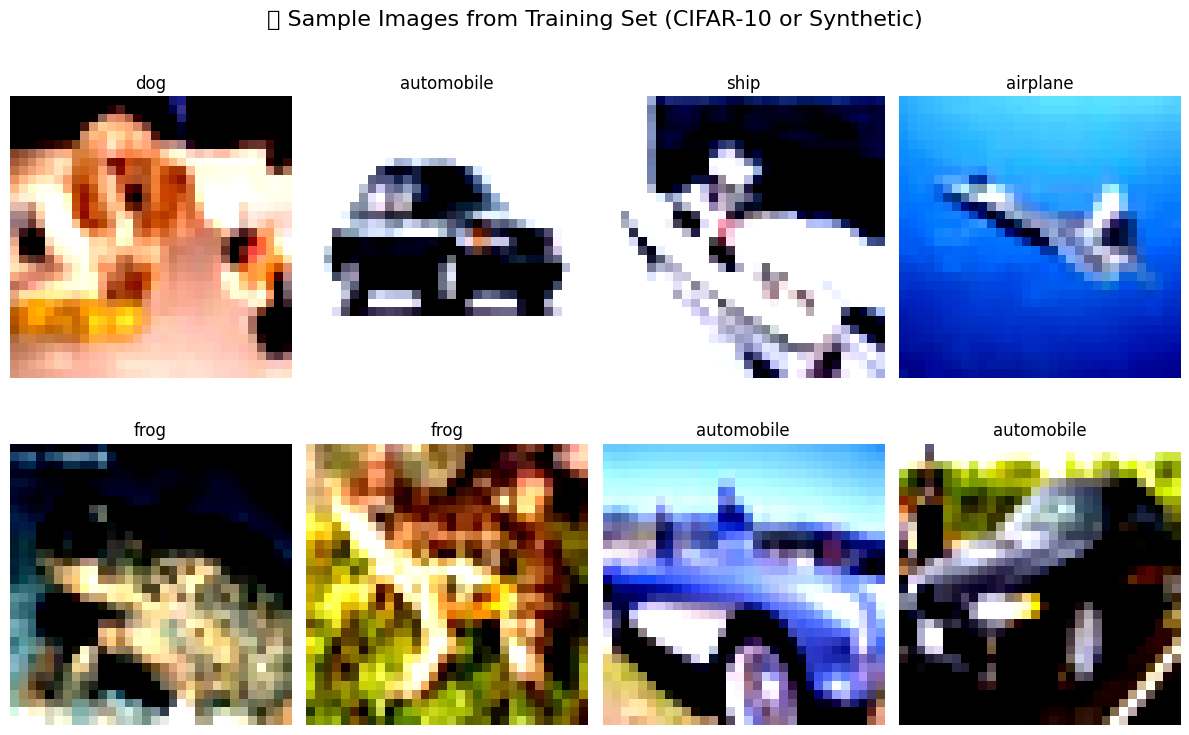

🎯 Batch shape: torch.Size([32, 3, 32, 32]) (batch_size, channels, height, width)
🏷️ Labels shape: torch.Size([32])
📋 Sample labels: ['dog', 'automobile', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'automobile']


In [33]:
# Function to display images
def imshow(img, title=None):
    """Display a tensor image."""
    # Handle both normalized and unnormalized images
    if img.min() < 0:  # If normalized, unnormalize
        img = img / 2 + 0.5

    # Clamp values to [0, 1] range
    img = torch.clamp(img, 0, 1)

    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis('off')

# Get a batch of training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Create a grid of sample images
plt.figure(figsize=(12, 8))
for i in range(8):  # Show first 8 images
    plt.subplot(2, 4, i + 1)
    imshow(images[i], title=f'{classes[labels[i]]}')

plt.suptitle('🖼️ Sample Images from Training Set (CIFAR-10 or Synthetic)', fontsize=16)
plt.tight_layout()
plt.show()

print(f"🎯 Batch shape: {images.shape} (batch_size, channels, height, width)")
print(f"🏷️ Labels shape: {labels.shape}")
print(f"📋 Sample labels: {[classes[label] for label in labels[:8]]}")

## 6. Building a Model with PyTorch Modules: LeNet-5

PyTorch models inherit from `torch.nn.Module`. We'll implement LeNet-5, the early CNN designed for handwritten digit recognition, adapted for Australian landmark classification. This follows the exact architecture described in the video:

- **C1**: Convolutional layer (6 feature maps, 5x5 kernel) - scans input for learned features
- **S2**: Subsampling layer (2x2 max pooling) - downsamples activation map
- **C3**: Convolutional layer (16 feature maps, 5x5 kernel) - scans for feature combinations  
- **S4**: Subsampling layer (2x2 max pooling) - downsamples again
- **F5**: Fully connected layer (120 units) - classification layer
- **F6**: Fully connected layer (84 units) - classification layer
- **Output**: Fully connected layer (8 Australian cities)

**PyTorch vs TensorFlow Model Definition**:
- **PyTorch**: Explicit `nn.Module` subclass with `__init__` and `forward` methods
- **TensorFlow**: `tf.keras.Sequential` or Functional API

In [34]:
class SimpleCIFAR10CNN(nn.Module):
    """
    Simple CNN for CIFAR-10 classification - Hello World PyTorch model.

    Architecture:
    - 2 Convolutional blocks (Conv2d + ReLU + MaxPool)
    - 2 Fully connected layers with dropout
    - Output: 10 classes (CIFAR-10)

    TensorFlow equivalent:
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10)
    ])
    """

    def __init__(self, num_classes=10):
        super(SimpleCIFAR10CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # 3 input channels (RGB)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 32 -> 64 channels

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduce spatial dimensions by half

        # Calculate size after convolutions: 32x32 -> 16x16 -> 8x8
        # Final feature map: 64 channels * 8 * 8 = 4096
        self.fc1 = nn.Linear(64 * 8 * 8, 64)  # First fully connected layer
        self.fc2 = nn.Linear(64, num_classes)  # Output layer

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): Input batch of images [batch_size, 3, 32, 32]

        Returns:
            torch.Tensor: Class logits [batch_size, num_classes]
        """
        # Convolutional block 1: Conv -> ReLU -> Pool
        x = self.pool(F.relu(self.conv1(x)))  # [batch, 32, 16, 16]

        # Convolutional block 2: Conv -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # [batch, 64, 8, 8]

        # Flatten for fully connected layers
        x = x.view(-1, 64 * 8 * 8)            # [batch, 4096]

        # Fully connected layers with dropout
        x = F.relu(self.fc1(x))               # [batch, 64]
        x = self.dropout(x)                   # Apply dropout during training
        x = self.fc2(x)                       # [batch, 10] - final logits

        return x

    def get_model_info(self):
        """Return model architecture information."""
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)

        return {
            'model_name': 'SimpleCIFAR10CNN',
            'total_parameters': total_params,
            'trainable_parameters': trainable_params,
            'architecture': 'Conv2d(32) -> Conv2d(64) -> FC(64) -> FC(10)'
        }

# Create model instance and move to device
model = SimpleCIFAR10CNN(num_classes=10).to(device)

# Display model information
model_info = model.get_model_info()
print(f"🧠 Model: {model_info['model_name']}")
print(f"🔢 Total parameters: {model_info['total_parameters']:,}")
print(f"🎯 Trainable parameters: {model_info['trainable_parameters']:,}")
print(f"🏗️ Architecture: {model_info['architecture']}")
print(f"\n📋 Model summary:")
print(model)

🧠 Model: SimpleCIFAR10CNN
🔢 Total parameters: 282,250
🎯 Trainable parameters: 282,250
🏗️ Architecture: Conv2d(32) -> Conv2d(64) -> FC(64) -> FC(10)

📋 Model summary:
SimpleCIFAR10CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


## 6. Loss Function and Optimizer Setup

**Key PyTorch Pattern**: Explicit loss and optimizer definition (vs TensorFlow's `model.compile()`):

In [35]:
# Loss function and optimizer setup
# TensorFlow equivalent: model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Optional: Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

print(f"🎯 Loss function: {criterion}")
print(f"🔧 Optimizer: {optimizer}")
print(f"📉 Learning rate scheduler: Step LR (decay by 0.5 every 5 epochs)")
print(f"📊 Initial learning rate: {optimizer.param_groups[0]['lr']}")

🎯 Loss function: CrossEntropyLoss()
🔧 Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    initial_lr: 0.001
    lr: 0.001
    maximize: False
    weight_decay: 0
)
📉 Learning rate scheduler: Step LR (decay by 0.5 every 5 epochs)
📊 Initial learning rate: 0.001


## 7. Training Loop Implementation

**Major Difference from TensorFlow**: PyTorch requires manual training loops instead of `model.fit()`.

This gives more control but requires more code:

In [36]:
def train_model(model, trainloader, testloader, criterion, optimizer, scheduler,
                num_epochs=5, device=device):
    """
    Training function with TensorBoard logging.

    TensorFlow equivalent:
    model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))

    Args:
        model: PyTorch model to train
        trainloader: Training data loader
        testloader: Test data loader
        criterion: Loss function
        optimizer: Optimizer
        scheduler: Learning rate scheduler
        num_epochs: Number of training epochs
        device: Device to train on (CPU/GPU)
    """

    print(f"🚀 Starting training for {num_epochs} epochs...")
    print(f"💾 Device: {device}")
    print(f"🔢 Batch size: {batch_size}")
    print(f"📊 Training batches per epoch: {len(trainloader)}")
    print(f"📊 Test batches: {len(testloader)}")
    print("-" * 50)

    # Training loop
    for epoch in range(num_epochs):
        # Training phase
        model.train()  # Set model to training mode (enables dropout, batch norm)
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (inputs, labels) in enumerate(trainloader):
            # Move data to device
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero gradients (PyTorch accumulates gradients by default)
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()    # Compute gradients
            optimizer.step()   # Update weights

            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Log batch-level metrics to TensorBoard
            if batch_idx % 200 == 0:  # Log every 200 batches
                writer.add_scalar('Loss/Train_Batch', loss.item(),
                                epoch * len(trainloader) + batch_idx)

        # Calculate epoch training metrics
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct_train / total_train

        # Validation phase
        model.eval()  # Set model to evaluation mode (disables dropout)
        test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():  # Disable gradient computation for efficiency
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        # Calculate test metrics
        test_loss = test_loss / len(testloader)
        test_acc = 100 * correct_test / total_test

        # Update learning rate
        scheduler.step()
        current_lr = optimizer.param_groups[0]['lr']

        # Log epoch-level metrics to TensorBoard
        writer.add_scalar('Loss/Train_Epoch', epoch_loss, epoch)
        writer.add_scalar('Loss/Test', test_loss, epoch)
        writer.add_scalar('Accuracy/Train', epoch_acc, epoch)
        writer.add_scalar('Accuracy/Test', test_acc, epoch)
        writer.add_scalar('Learning_Rate', current_lr, epoch)

        # Log model parameters histogram
        for name, param in model.named_parameters():
            writer.add_histogram(f'Parameters/{name}', param, epoch)

        # Print epoch results
        print(f'Epoch [{epoch+1}/{num_epochs}]:')
        print(f'  Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%')
        print(f'  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')
        print(f'  Learning Rate: {current_lr:.6f}')

        # Early stopping for demo (if we reach good accuracy)
        if test_acc > 65.0:  # CIFAR-10 is challenging, 65% is decent for a simple model
            print(f"\n🎉 Early stopping! Achieved {test_acc:.2f}% test accuracy.")
            break

    print("\n✅ Training completed!")
    return model

# Train the model (using small number of epochs for demo)
num_epochs = 8  # Small number for educational purposes
trained_model = train_model(
    model, trainloader, testloader, criterion, optimizer, scheduler,
    num_epochs=num_epochs, device=device
)

🚀 Starting training for 8 epochs...
💾 Device: cuda
🔢 Batch size: 32
📊 Training batches per epoch: 1563
📊 Test batches: 313
--------------------------------------------------
Epoch [1/8]:
  Train Loss: 1.6495, Train Acc: 39.38%
  Test Loss: 1.2736, Test Acc: 53.56%
  Learning Rate: 0.001000
Epoch [2/8]:
  Train Loss: 1.3846, Train Acc: 49.53%
  Test Loss: 1.0907, Test Acc: 61.44%
  Learning Rate: 0.001000
Epoch [3/8]:
  Train Loss: 1.2771, Train Acc: 53.94%
  Test Loss: 1.0257, Test Acc: 64.11%
  Learning Rate: 0.001000
Epoch [4/8]:
  Train Loss: 1.1998, Train Acc: 57.09%
  Test Loss: 0.9588, Test Acc: 66.57%
  Learning Rate: 0.001000

🎉 Early stopping! Achieved 66.57% test accuracy.

✅ Training completed!


## 8. Model Evaluation and Testing

Let's evaluate our trained model on the test set:

In [37]:
# Evaluate model on test set
def evaluate_model(model, testloader, classes, device=device):
    """
    Evaluate the trained model and show per-class accuracy.
    """
    model.eval()
    correct = 0
    total = 0
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(labels.size(0)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    # Overall accuracy
    overall_accuracy = 100 * correct / total
    print(f"🎯 Overall Test Accuracy: {overall_accuracy:.2f}%")
    print("\n📊 Per-class accuracy:")

    # Per-class accuracy
    for i in range(len(classes)):
        if class_total[i] > 0:
            accuracy = 100 * class_correct[i] / class_total[i]
            print(f"  {classes[i]:>12}: {accuracy:.1f}%")

    return overall_accuracy

# Evaluate the model
print("🔍 Evaluating trained model...")
final_accuracy = evaluate_model(trained_model, testloader, classes)

🔍 Evaluating trained model...
🎯 Overall Test Accuracy: 66.57%

📊 Per-class accuracy:
      airplane: 70.9%
    automobile: 80.8%
          bird: 41.3%
           cat: 45.2%
          deer: 63.0%
           dog: 58.6%
          frog: 71.8%
         horse: 81.3%
          ship: 78.2%
         truck: 74.6%


## 9. Predictions on Sample Images

Let's see how our model performs on some test images:

/tmp/ipython-input-3490239234.py:40: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


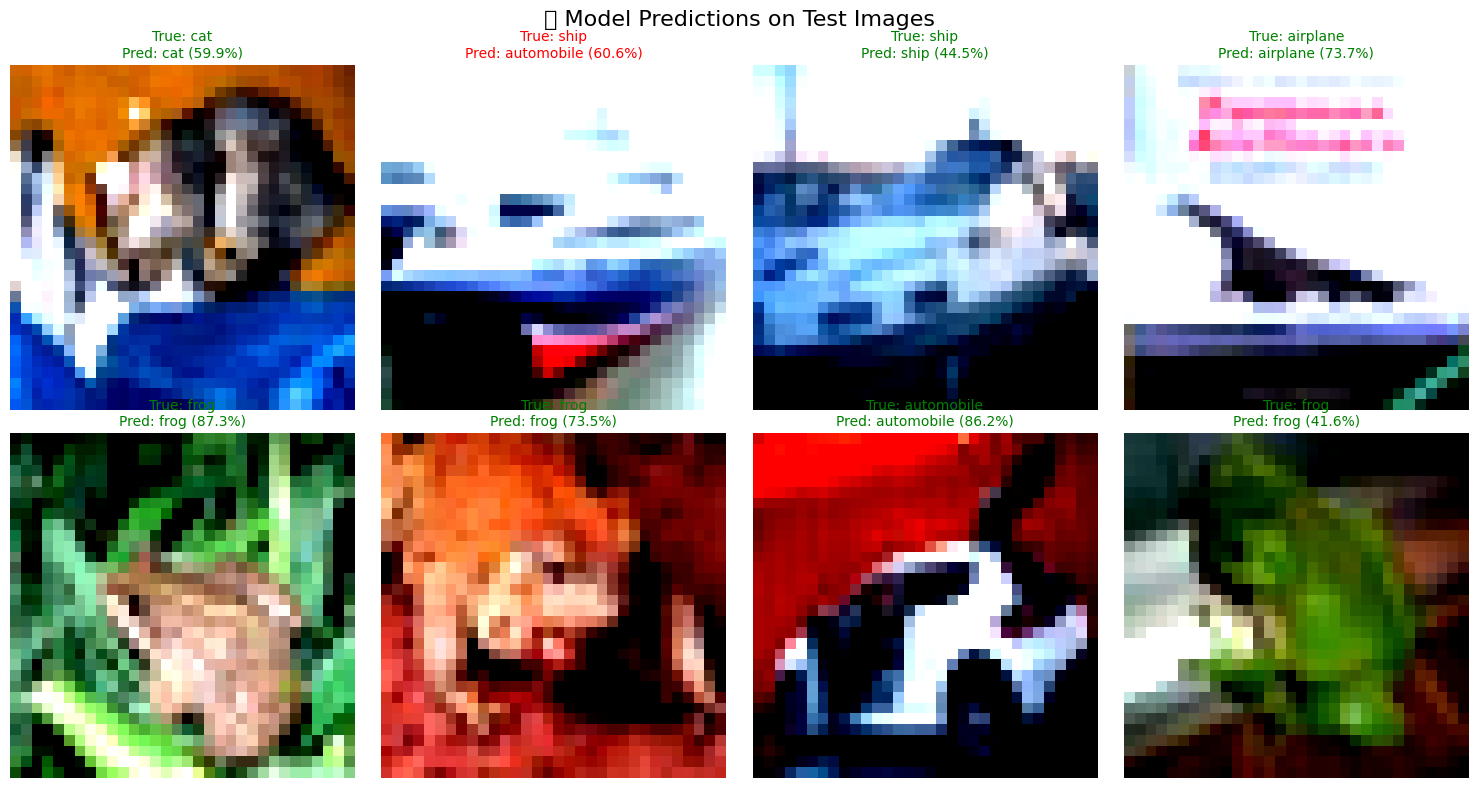

📊 Batch accuracy: 81.2% (26/32 correct)


In [38]:
# Make predictions on sample test images
def predict_samples(model, testloader, classes, num_samples=8, device=device):
    """
    Show predictions on sample test images.
    """
    model.eval()

    # Get a batch of test images
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)

    # Make predictions
    with torch.no_grad():
        outputs = model(images)
        probabilities = F.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

    # Plot results
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(2, 4, i + 1)

        # Move image back to CPU for plotting
        img = images[i].cpu()
        imshow(img)

        # Get prediction info
        true_label = classes[labels[i]]
        pred_label = classes[predicted[i]]
        confidence = probabilities[i][predicted[i]].item() * 100

        # Color: green if correct, red if wrong
        color = 'green' if predicted[i] == labels[i] else 'red'

        plt.title(f'True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)',
                 color=color, fontsize=10)

    plt.suptitle('🔮 Model Predictions on Test Images', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Calculate accuracy for this batch
    correct = (predicted == labels).sum().item()
    batch_accuracy = 100 * correct / len(labels)
    print(f"📊 Batch accuracy: {batch_accuracy:.1f}% ({correct}/{len(labels)} correct)")

# Show sample predictions
predict_samples(trained_model, testloader, classes)

## 10. TensorBoard Visualization Instructions

View your training progress with TensorBoard:

In [39]:
# Close TensorBoard writer
writer.close()

# Display TensorBoard viewing instructions
print("=" * 60)
print("📊 TENSORBOARD VISUALIZATION")
print("=" * 60)
print(f"Log directory: {log_dir}")
print("\n🚀 To view TensorBoard:")

if IS_COLAB:
    print("   In Google Colab:")
    print("   1. Run: %load_ext tensorboard")
    print(f"   2. Run: %tensorboard --logdir {log_dir}")
    print("   3. TensorBoard will appear inline in the notebook")
elif IS_KAGGLE:
    print("   In Kaggle:")
    print(f"   1. Download logs from: {log_dir}")
    print("   2. Run locally: tensorboard --logdir ./tensorboard_logs")
    print("   3. Open http://localhost:6006 in browser")
else:
    print("   Locally:")
    print(f"   1. Run: tensorboard --logdir {log_dir}")
    print("   2. Open http://localhost:6006 in browser")

print("\n📈 Available visualizations:")
print("   • Scalars: Loss, accuracy, learning rate over time")
print("   • Histograms: Model parameter distributions")
print("   • Graphs: Model architecture visualization")
print("=" * 60)

📊 TENSORBOARD VISUALIZATION
Log directory: /content/tensorboard_logs/hello_pytorch_cifar_2025_09_21-10_01_15

🚀 To view TensorBoard:
   In Google Colab:
   1. Run: %load_ext tensorboard
   2. Run: %tensorboard --logdir /content/tensorboard_logs/hello_pytorch_cifar_2025_09_21-10_01_15
   3. TensorBoard will appear inline in the notebook

📈 Available visualizations:
   • Scalars: Loss, accuracy, learning rate over time
   • Histograms: Model parameter distributions
   • Graphs: Model architecture visualization


## 11. Key Learning Points: TensorFlow vs PyTorch

Summary of key differences encountered in this "Hello World" example:

In [40]:
print("""
🎓 KEY LEARNING POINTS: TensorFlow → PyTorch Transition

1. 🏗️ MODEL DEFINITION:
   TensorFlow: tf.keras.Sequential() or Functional API
   PyTorch:    nn.Module subclass with __init__ and forward methods

2. 🔄 TRAINING LOOPS:
   TensorFlow: model.fit() handles everything automatically
   PyTorch:    Manual loops with optimizer.zero_grad(), loss.backward(), optimizer.step()

3. 📊 DATA LOADING:
   TensorFlow: tf.data.Dataset with built-in batching
   PyTorch:    DataLoader with explicit dataset and transforms

4. 🎯 LOSS & OPTIMIZATION:
   TensorFlow: model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
   PyTorch:    Explicit criterion = nn.CrossEntropyLoss() and optimizer = optim.Adam()

5. 💾 DEVICE MANAGEMENT:
   TensorFlow: Mostly automatic with tf.distribute.Strategy
   PyTorch:    Explicit .to(device) calls for model and data

6. 🎭 TRAINING/INFERENCE MODES:
   TensorFlow: Implicit (training=True/False parameter)
   PyTorch:    Explicit model.train() and model.eval() calls

7. 📈 MONITORING:
   TensorFlow: Built-in callbacks and metrics
   PyTorch:    Manual TensorBoard logging with SummaryWriter

🚀 ADVANTAGES OF PYTORCH:
   ✅ More explicit control over training process
   ✅ Dynamic computation graphs (easier debugging)
   ✅ Pythonic and intuitive API
   ✅ Better integration with Hugging Face transformers
   ✅ Immediate execution (no session.run())

🎯 NEXT STEPS:
   1. Practice with more complex architectures
   2. Explore Hugging Face transformers
   3. Learn custom dataset creation
   4. Study advanced PyTorch features (autograd, hooks, etc.)
""")


🎓 KEY LEARNING POINTS: TensorFlow → PyTorch Transition

1. 🏗️ MODEL DEFINITION:
   TensorFlow: tf.keras.Sequential() or Functional API
   PyTorch:    nn.Module subclass with __init__ and forward methods

2. 🔄 TRAINING LOOPS:
   TensorFlow: model.fit() handles everything automatically
   PyTorch:    Manual loops with optimizer.zero_grad(), loss.backward(), optimizer.step()

3. 📊 DATA LOADING:
   TensorFlow: tf.data.Dataset with built-in batching
   PyTorch:    DataLoader with explicit dataset and transforms

4. 🎯 LOSS & OPTIMIZATION:
   TensorFlow: model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
   PyTorch:    Explicit criterion = nn.CrossEntropyLoss() and optimizer = optim.Adam()

5. 💾 DEVICE MANAGEMENT:
   TensorFlow: Mostly automatic with tf.distribute.Strategy
   PyTorch:    Explicit .to(device) calls for model and data

6. 🎭 TRAINING/INFERENCE MODES:
   TensorFlow: Implicit (training=True/False parameter)
   PyTorch:    Explicit model.train() and model.eval

## 11. Deployment with TorchScript

TorchScript converts PyTorch models for production deployment, removing Python interpreter dependency and enabling optimization. This is a key difference from TensorFlow's graph mode - PyTorch uses TorchScript for deployment optimization.

In [41]:
print("🚀 TorchScript: Production Deployment (from the video)\n")

# Convert model to TorchScript (as described in the video)
print("📦 Converting PyTorch Model to TorchScript...")

# Set model to evaluation mode
trained_model.eval()

# Method 1: Scripting (torch.jit.script) - one line conversion from video
try:
    scripted_model = torch.jit.script(trained_model)
    print("✅ Model successfully converted using torch.jit.script()")
    conversion_method = "script"
except Exception as e:
    print(f"⚠️ Scripting failed: {e}")
    print("📝 Falling back to tracing...")

    # Method 2: Tracing (torch.jit.trace)
    example_input = torch.randn(1, 3, 32, 32).to(device)  # CIFAR-10 input shape
    scripted_model = torch.jit.trace(trained_model, example_input)
    print("✅ Model successfully converted using torch.jit.trace()")
    conversion_method = "trace"

print(f"🔧 Conversion method: {conversion_method}")
print(f"📊 Original model type: {type(trained_model)}")
print(f"📊 TorchScript model type: {type(scripted_model)}")

# Save TorchScript model (contains computation graph + weights)
torchscript_path = "australian_model_torchscript.pt"
scripted_model.save(torchscript_path)
print(f"\n💾 TorchScript model saved to: {torchscript_path}")

# Get file size
import os
file_size = os.path.getsize(torchscript_path) / (1024 * 1024)  # MB
print(f"📁 Model file size: {file_size:.2f} MB")

print(f"\n🚀 TorchScript Benefits (from the video):")
print(f"   ✅ No Python interpreter required")
print(f"   ✅ JIT compiler optimizations (operation reordering, layer fusion)")
print(f"   ✅ Can run in C++ runtime")
print(f"   ✅ Optimized for production deployment")
print(f"   ✅ Contains all model information (graph + weights)")

🚀 TorchScript: Production Deployment (from the video)

📦 Converting PyTorch Model to TorchScript...
✅ Model successfully converted using torch.jit.script()
🔧 Conversion method: script
📊 Original model type: <class '__main__.SimpleCIFAR10CNN'>
📊 TorchScript model type: <class 'torch.jit._script.RecursiveScriptModule'>

💾 TorchScript model saved to: australian_model_torchscript.pt
📁 Model file size: 1.09 MB

🚀 TorchScript Benefits (from the video):
   ✅ No Python interpreter required
   ✅ JIT compiler optimizations (operation reordering, layer fusion)
   ✅ Can run in C++ runtime
   ✅ Optimized for production deployment
   ✅ Contains all model information (graph + weights)


In [42]:
# Test TorchScript model loading and inference
print("🧪 Testing TorchScript Model Loading and Inference\n")

# Load the saved TorchScript model (as shown in video)
loaded_model = torch.jit.load(torchscript_path)
loaded_model.eval()
print(f"✅ TorchScript model loaded successfully")
print(f"📊 Loaded model type: {type(loaded_model)}")

# Test with sample data
print(f"\n🧪 Testing inference consistency:")

# Create sample input
test_input = torch.randn(2, 3, 32, 32).to(device)  # Batch of 2 images

# Compare original vs TorchScript predictions
with torch.no_grad():
    # Original PyTorch model
    original_output = trained_model(test_input)
    original_probs = torch.softmax(original_output, dim=1)

    # TorchScript model
    script_output = loaded_model(test_input)
    script_probs = torch.softmax(script_output, dim=1)

    # Check consistency
    max_diff = torch.max(torch.abs(original_probs - script_probs)).item()

    print(f"Original model predictions: {torch.argmax(original_probs, dim=1)}")
    print(f"TorchScript predictions:     {torch.argmax(script_probs, dim=1)}")
    print(f"Maximum probability difference: {max_diff:.6f}")

    consistent = max_diff < 1e-6
    print(f"Consistency check: {'✅ PASS' if consistent else '❌ FAIL'}")

print(f"\n📱 Deployment Options (from the video):")
print(f"   • Python: torch.jit.load('model.pt')")
print(f"   • C++: torch::jit::load('model.pt')")
print(f"   • Mobile: ExecuTorch (iOS/Android)")
print(f"   • Server: TorchServe for REST APIs")
print(f"   • Cloud: AWS SageMaker, Azure ML, Google Cloud")

print(f"\n🔧 TorchScript vs TensorFlow Deployment:")
print(f"   TensorFlow: SavedModel format with tf.saved_model.save()")
print(f"   PyTorch:    TorchScript with torch.jit.script() or torch.jit.trace()")
print(f"   TensorFlow: TensorFlow Serving, TensorFlow Lite")
print(f"   PyTorch:    TorchServe, ExecuTorch")

🧪 Testing TorchScript Model Loading and Inference

✅ TorchScript model loaded successfully
📊 Loaded model type: <class 'torch.jit._script.RecursiveScriptModule'>

🧪 Testing inference consistency:
Original model predictions: tensor([6, 6], device='cuda:0')
TorchScript predictions:     tensor([6, 6], device='cuda:0')
Maximum probability difference: 0.000000
Consistency check: ✅ PASS

📱 Deployment Options (from the video):
   • Python: torch.jit.load('model.pt')
   • C++: torch::jit::load('model.pt')
   • Mobile: ExecuTorch (iOS/Android)
   • Server: TorchServe for REST APIs
   • Cloud: AWS SageMaker, Azure ML, Google Cloud

🔧 TorchScript vs TensorFlow Deployment:
   TensorFlow: SavedModel format with tf.saved_model.save()
   PyTorch:    TorchScript with torch.jit.script() or torch.jit.trace()
   TensorFlow: TensorFlow Serving, TensorFlow Lite
   PyTorch:    TorchServe, ExecuTorch


## 12. Model Saving (Optional)

Save your trained model for future use:

In [43]:
# Save the trained model
model_save_path = './hello_pytorch_cifar10_model.pth'

# PyTorch way: Save state dictionary
torch.save(trained_model.state_dict(), model_save_path)
print(f"💾 Model saved to: {model_save_path}")

# To load the model later:
# model = SimpleCIFAR10CNN()
# model.load_state_dict(torch.load(model_save_path))
# model.eval()

print(f"🎉 Hello PyTorch CIFAR-10 tutorial completed!")
print(f"📊 Final test accuracy: {final_accuracy:.2f}%")
print(f"🧠 Model parameters: {model.get_model_info()['total_parameters']:,}")
print(f"⏱️ Training epochs: {num_epochs}")

💾 Model saved to: ./hello_pytorch_cifar10_model.pth
🎉 Hello PyTorch CIFAR-10 tutorial completed!
📊 Final test accuracy: 66.57%
🧠 Model parameters: 282,250
⏱️ Training epochs: 8


---

## 🎓 Congratulations!

You've successfully completed your first PyTorch "Hello World" with CIFAR-10! You've learned:

✅ **PyTorch Fundamentals**: Tensors, autograd, and nn.Module  
✅ **Model Definition**: Creating CNN architectures with PyTorch  
✅ **Data Handling**: DataLoaders and transforms  
✅ **Training Loops**: Manual training vs TensorFlow's model.fit()  
✅ **Monitoring**: TensorBoard integration for PyTorch  
✅ **Model Evaluation**: Testing and visualization  

### 🚀 Next Steps in Your PyTorch Journey:

1. **Advanced CNN Architectures**: ResNet, VGG, EfficientNet
2. **Transfer Learning**: Using pre-trained models
3. **Hugging Face Integration**: Modern NLP with transformers
4. **Custom Datasets**: Working with your own data
5. **Advanced Training**: Mixed precision, distributed training

**Happy learning with PyTorch!** 🔥

---

*This notebook demonstrates fundamental PyTorch concepts through a practical CIFAR-10 classification example. For more advanced tutorials and examples, explore the other notebooks in this repository.*

## 🎉 Congratulations!

You've completed a comprehensive introduction to PyTorch! Let's summarize what you've learned:

In [44]:
print("🎓 PyTorch Introduction: Complete!\n")

print("📚 What You've Learned (Based on Brad Heinz's PyTorch Introduction):")
topics_covered = [
    "PyTorch ecosystem and key features",
    "Tensors: 300+ operations, multi-dimensional arrays with superpowers",
    "Autograd: automatic differentiation engine and .backward() magic",
    "Neural networks with nn.Module (LeNet-5 architecture from video)",
    "Efficient data loading with Dataset and DataLoader",
    "Manual training loops vs TensorFlow's model.fit()",
    "TensorBoard integration for monitoring",
    "TorchScript for production deployment and optimization"
]

for i, topic in enumerate(topics_covered, 1):
    print(f"  {i}. ✅ {topic}")

print(f"\n🌏 Australian Context Applications:")
australian_examples = [
    "Tourism data analysis with tensor operations",
    "Weather pattern analysis across Australian cities",
    "City classification with LeNet architecture",
    "RNN-style autograd with Australian city features",
    "English-Vietnamese multilingual processing concepts"
]

for example in australian_examples:
    print(f"  🏖️ {example}")

print(f"\n🔄 TensorFlow → PyTorch Transition Mastered:")
print(f"  ✅ Model definition patterns (nn.Module vs tf.keras.Sequential)")
print(f"  ✅ Training loop differences (manual vs model.fit())")
print(f"  ✅ Data loading approaches (DataLoader vs tf.data)")
print(f"  ✅ Device management (explicit .to(device) vs automatic)")
print(f"  ✅ Gradient computation (loss.backward() vs GradientTape)")

print(f"\n🎯 Next Steps in Your PyTorch Journey:")
next_steps = [
    "🤗 Hugging Face Transformers: Modern NLP with PyTorch",
    "📊 Advanced data loading with custom transforms",
    "🔥 Advanced neural architectures (ResNet, Transformer)",
    "⚡ Mixed precision training and optimization",
    "🚀 Distributed training across multiple GPUs",
    "📱 Mobile deployment with ExecuTorch",
    "🌐 REST API deployment with TorchServe"
]

for step in next_steps:
    print(f"  {step}")

print(f"\n📖 Recommended Resources:")
print(f"  • PyTorch Tutorials: https://docs.pytorch.org/tutorials/")
print(f"  • Hugging Face Course: https://huggingface.co/learn")
print(f"  • Hugging Face Trending Papers: https://huggingface.co/papers/trending")
print(f"  • PyTorch Forums: https://discuss.pytorch.org/")

print(f"\n🚀 You're now ready to build amazing AI applications with PyTorch!")
print(f"🌟 From research prototyping to production deployment with TorchScript.")
print(f"🎯 Next: Explore the Hugging Face ecosystem for state-of-the-art NLP!")

🎓 PyTorch Introduction: Complete!

📚 What You've Learned (Based on Brad Heinz's PyTorch Introduction):
  1. ✅ PyTorch ecosystem and key features
  2. ✅ Tensors: 300+ operations, multi-dimensional arrays with superpowers
  3. ✅ Autograd: automatic differentiation engine and .backward() magic
  4. ✅ Neural networks with nn.Module (LeNet-5 architecture from video)
  5. ✅ Efficient data loading with Dataset and DataLoader
  6. ✅ Manual training loops vs TensorFlow's model.fit()
  7. ✅ TensorBoard integration for monitoring
  8. ✅ TorchScript for production deployment and optimization

🌏 Australian Context Applications:
  🏖️ Tourism data analysis with tensor operations
  🏖️ Weather pattern analysis across Australian cities
  🏖️ City classification with LeNet architecture
  🏖️ RNN-style autograd with Australian city features
  🏖️ English-Vietnamese multilingual processing concepts

🔄 TensorFlow → PyTorch Transition Mastered:
  ✅ Model definition patterns (nn.Module vs tf.keras.Sequential)
  